In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import re

In [36]:
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQbGunXEWmDXES66FHhn9h_Xp8BYvNDOQNGc9FAyIKZpGQwwhFud5B-9wmJaRbPkXc9fjRq072jHJG1/pub?output=xlsx'

In [37]:
survey = pd.read_excel(url, sheet_name=None)

In [38]:
survey1 = survey['Form Responses 1']
survey1.columns

Index(['Timestamp',
       '1. On a typical working day, how many Japan visa inquiries via Messenger do you personally handle?',
       '2. How often do you feel overwhelmed by the number of Messenger inquiries from customers?',
       '3. On average, how long does it take for you (or the agency) to respond to Messenger inquiries about Japan visa applications?',
       '4. How easy is it for you to provide customers with consistent answers on Messenger (without contradictions from other staff)?',
       '5. What usually happens when customers send Messenger inquiries outside of regular office hours?',
       '6. In your opinion, what improvements would help you respond faster and more consistently to Messenger inquiries about Japan visas?',
       '7. From your experience, what are the top 3–5 most frequently asked questions about Japan visa inquiries you receive on Messenger?',
       '8. How often do you receive repeated questions from different customers (e.g., the same requirement 

In [39]:
survey1.columns = [re.sub(r'^\s*\d+\.\s*', '', col) for col in survey1.columns]

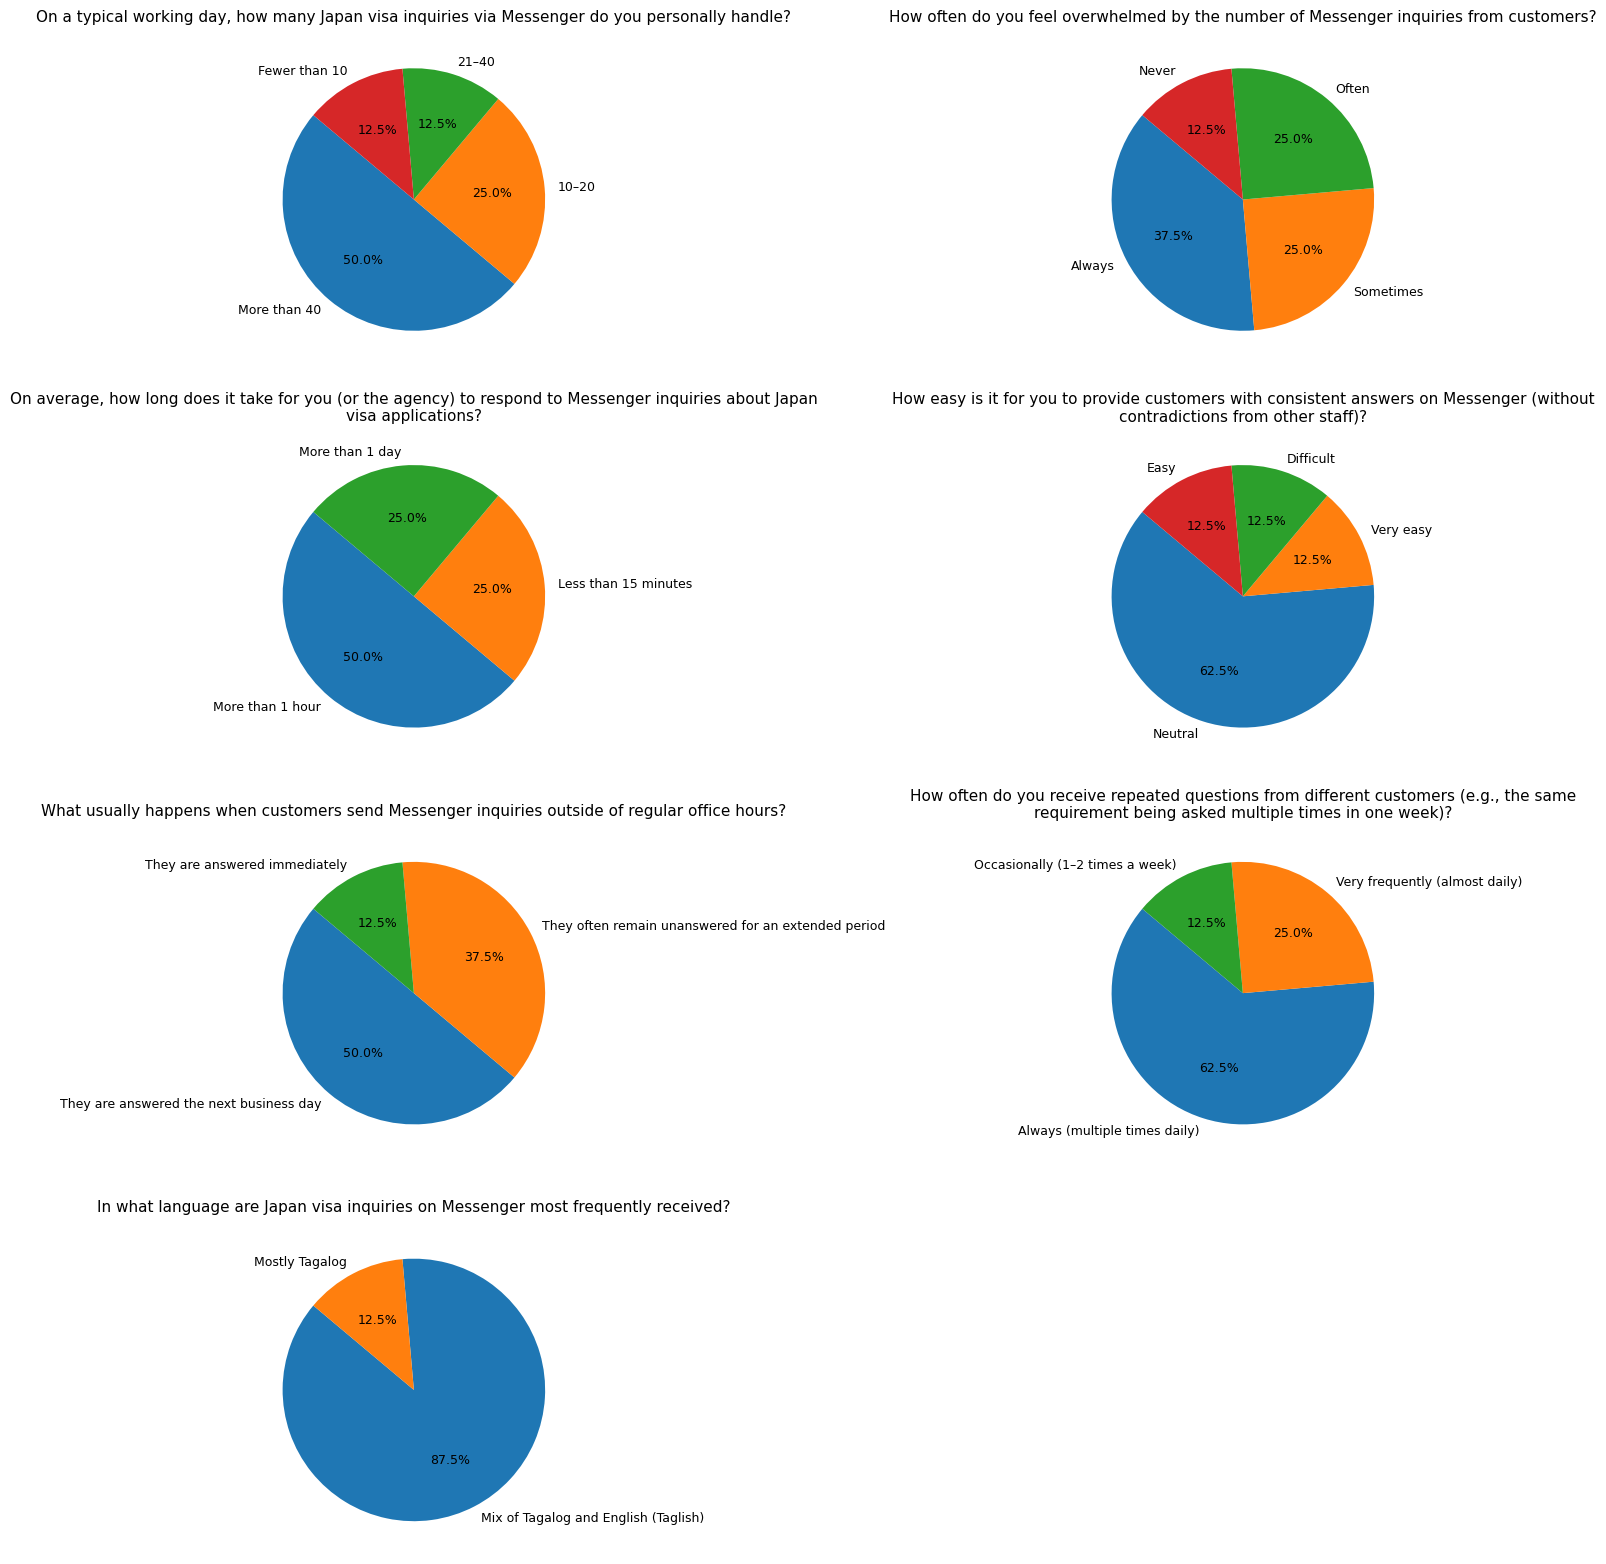

In [40]:
import math
import matplotlib.pyplot as plt
import re

# --- Select columns (skip Timestamp)
cols = list(survey1.columns[1:6]) + list(survey1.columns[8:])

# --- Clean column names: remove numbering like "1. ", "2) ", "3 - "
clean_cols = [re.sub(r'^\s*\d+[\.\-\)]\s*', '', col).strip() for col in cols]

num_cols = len(clean_cols)

# --- Define grid layout (3 columns per row)
ncols = 2
nrows = math.ceil(num_cols / ncols)

# --- Create figure and subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

# --- Loop through questions and plot
for i, col in enumerate(cols):
    value_counts = survey1[col].value_counts(dropna=False)
    
    axes[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 9}
    )
    
    # Use cleaned title
    axes[i].set_title(clean_cols[i], wrap=True, fontsize=11, pad=10)

# --- Hide empty subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout(pad=2)
plt.show()


# SUS score analysis

✅ Individual SUS Scores:
                Timestamp  SUS_Score
0 2025-10-05 12:22:43.632       82.5
1 2025-10-05 12:32:27.450       95.0
2 2025-10-05 12:38:17.418       90.0

🏁 Overall Average SUS Score: 89.17

🧭 SUS Score Interpretation:
                Timestamp  SUS_Score Interpretation
0 2025-10-05 12:22:43.632       82.5       Good (B)
1 2025-10-05 12:32:27.450       95.0  Excellent (A)
2 2025-10-05 12:38:17.418       90.0  Excellent (A)

💯 Overall SUS Interpretation: Excellent (A)


/var/folders/0r/dktk9n0551j0gkccz4k6246h0000gn/T/ipykernel_8249/3860322634.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus[sus_cols] = sus[sus_cols].apply(pd.to_numeric, errors='coerce')
/var/folders/0r/dktk9n0551j0gkccz4k6246h0000gn/T/ipykernel_8249/3860322634.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sus["SUS_Total"] = adjusted_scores.sum(axis=1)
/var/folders/0r/dktk9n0551j0gkccz4k6246h0000gn/T/ipykernel_8249/3860322634.py:37: SettingWithCopyWarning: 
A value is trying to be set on a c

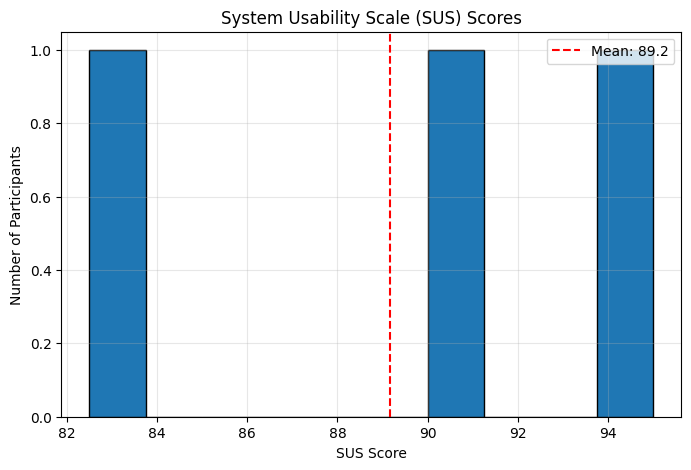

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# ============================
# 🧠 STEP 1: Get the SUS responses
# ============================
sus = survey['Form Responses 2']

# Explicitly define question columns (skip Timestamp)
# Assuming first column is 'Timestamp', next 10 are Q1–Q10
sus_cols = sus.columns[1:11]  # skip Timestamp column
timestamp_col = sus.columns[0]

sus = sus[[timestamp_col] + list(sus_cols)]

# Convert responses to numeric (in case they're strings)
sus[sus_cols] = sus[sus_cols].apply(pd.to_numeric, errors='coerce')

# ============================
# ⚙️ STEP 2: Define scoring rules
# ============================
positive_items = [1, 3, 5, 7, 9]
negative_items = [2, 4, 6, 8, 10]

adjusted_scores = pd.DataFrame()

for i, q in enumerate(sus_cols, start=1):
    if i in positive_items:
        adjusted_scores[q] = sus[q] - 1
    else:
        adjusted_scores[q] = 5 - sus[q]

# ============================
# 🧮 STEP 3: Compute SUS scores
# ============================
sus["SUS_Total"] = adjusted_scores.sum(axis=1)
sus["SUS_Score"] = sus["SUS_Total"] * 2.5

# ============================
# 📊 STEP 4: Compute overall results
# ============================
overall_sus = sus["SUS_Score"].mean()

print("✅ Individual SUS Scores:")
print(sus[[timestamp_col, "SUS_Score"]])

print(f"\n🏁 Overall Average SUS Score: {overall_sus:.2f}")

# ============================
# 💬 STEP 5: Interpret the score
# ============================
def interpret_sus(score):
    if score >= 85:
        return "Excellent (A)"
    elif score >= 80:
        return "Good (B)"
    elif score >= 70:
        return "OK (C)"
    elif score >= 60:
        return "Poor (D)"
    else:
        return "Awful (F)"

sus["Interpretation"] = sus["SUS_Score"].apply(interpret_sus)
print("\n🧭 SUS Score Interpretation:")
print(sus[[timestamp_col, "SUS_Score", "Interpretation"]])

print(f"\n💯 Overall SUS Interpretation: {interpret_sus(overall_sus)}")

# ============================
# 📈 STEP 6: Visualization
# ============================
plt.figure(figsize=(8, 5))
plt.hist(sus["SUS_Score"], bins=10, edgecolor="black")
plt.axvline(overall_sus, color="red", linestyle="--", label=f"Mean: {overall_sus:.1f}")
plt.title("System Usability Scale (SUS) Scores")
plt.xlabel("SUS Score")
plt.ylabel("Number of Participants")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


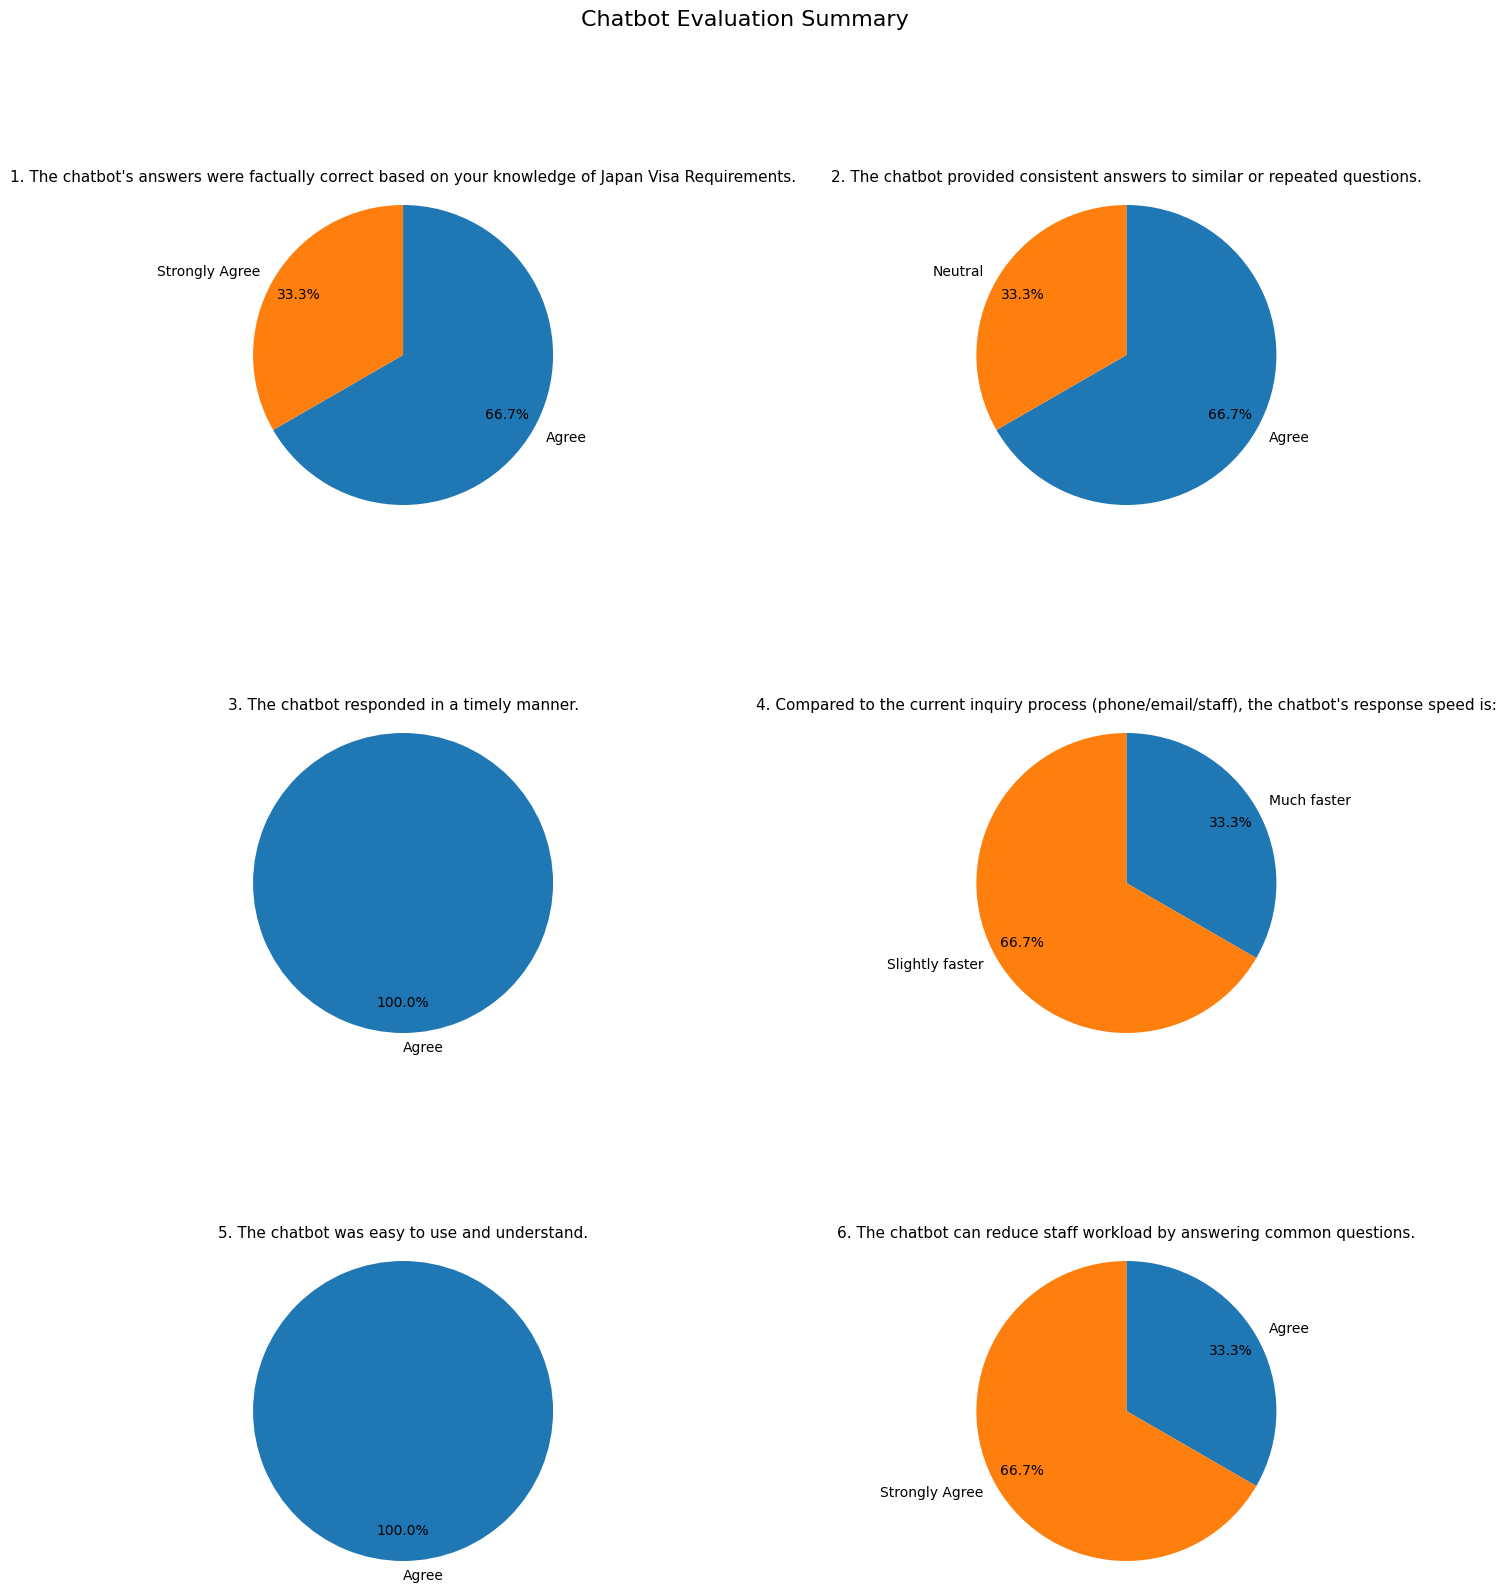

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

survey2 = survey['Form Responses 2']
survey2_cols = survey2.columns[11:]
survey2 = survey2[survey2_cols]

# Mapping for 2-line labels
label_map = {
    1: "1\nStrongly Disagree",
    2: "2\nDisagree",
    3: "3\nNeutral",
    4: "4\nAgree",
    5: "5\nStrongly Agree"
}

# Create figure and axes (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(16, 18))  # wider and taller
axes = axes.flatten()

for i, q in enumerate(survey2_cols):
    ax = axes[i]
    
    counts = survey2[q].value_counts().sort_index()
    labels = [label_map.get(val, str(val)) for val in counts.index]
    
    # Pie chart with labels outside
    ax.pie(
        counts,
        labels=labels,
        autopct="%1.1f%%",
        startangle=90,
        counterclock=False,
        labeldistance=1.1,   # move labels outside
        pctdistance=0.8       # move percentage slightly outside
    )
    ax.set_title(q, wrap=True, fontsize=11)
    ax.axis("equal")

# Hide unused axes if any
for j in range(len(survey2_cols), len(axes)):
    axes[j].axis("off")

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4, hspace=0.6)

plt.suptitle("Chatbot Evaluation Summary", fontsize=16, y=0.98)
plt.show()
